In [36]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer

In [37]:
import sys
import os

# Add your script folder to Python path
script_path = "../scripts/data_cleaning.py"  # Update this path
sys.path.append(script_path)

# Verify
print(sys.path) 

['C:\\Program Files\\Python313\\python313.zip', 'C:\\Program Files\\Python313\\DLLs', 'C:\\Program Files\\Python313\\Lib', 'C:\\Program Files\\Python313', 'c:\\Users\\HP\\Desktop\\10 Acadamy\\AIM Week 8&9\\AIM_WEEK_8-9\\adey', '', 'c:\\Users\\HP\\Desktop\\10 Acadamy\\AIM Week 8&9\\AIM_WEEK_8-9\\adey\\Lib\\site-packages', 'c:\\Users\\HP\\Desktop\\10 Acadamy\\AIM Week 8&9\\AIM_WEEK_8-9\\adey\\Lib\\site-packages\\win32', 'c:\\Users\\HP\\Desktop\\10 Acadamy\\AIM Week 8&9\\AIM_WEEK_8-9\\adey\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\HP\\Desktop\\10 Acadamy\\AIM Week 8&9\\AIM_WEEK_8-9\\adey\\Lib\\site-packages\\Pythonwin', '../scripts/data_cleaning.py', '../scripts/data_cleaning.py', 'c:\\Users\\HP\\Desktop\\10 Acadamy\\AIM Week 8&9\\AIM_WEEK_8-9', 'c:\\Users\\HP\\Desktop\\10 Acadamy\\AIM Week 8&9\\AIM_WEEK_8-9\\scripts', '../scripts/data_cleaning.py']


In [38]:
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.path.dirname("../scripts"))))

In [39]:
from scripts.data_cleaning import handle_missing, clean_data, perform_eda,convert_ip,merge_geo_data,create_features,scale_features,encode_features

In [40]:
import sys
import os

# Add scripts folder to Python path
script_dir = os.path.abspath('../scripts')  # Update path as needed
if script_dir not in sys.path:
    sys.path.append(script_dir)

# Verify
print("Current Python path:", sys.path)

Current Python path: ['C:\\Program Files\\Python313\\python313.zip', 'C:\\Program Files\\Python313\\DLLs', 'C:\\Program Files\\Python313\\Lib', 'C:\\Program Files\\Python313', 'c:\\Users\\HP\\Desktop\\10 Acadamy\\AIM Week 8&9\\AIM_WEEK_8-9\\adey', '', 'c:\\Users\\HP\\Desktop\\10 Acadamy\\AIM Week 8&9\\AIM_WEEK_8-9\\adey\\Lib\\site-packages', 'c:\\Users\\HP\\Desktop\\10 Acadamy\\AIM Week 8&9\\AIM_WEEK_8-9\\adey\\Lib\\site-packages\\win32', 'c:\\Users\\HP\\Desktop\\10 Acadamy\\AIM Week 8&9\\AIM_WEEK_8-9\\adey\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\HP\\Desktop\\10 Acadamy\\AIM Week 8&9\\AIM_WEEK_8-9\\adey\\Lib\\site-packages\\Pythonwin', '../scripts/data_cleaning.py', '../scripts/data_cleaning.py', 'c:\\Users\\HP\\Desktop\\10 Acadamy\\AIM Week 8&9\\AIM_WEEK_8-9', 'c:\\Users\\HP\\Desktop\\10 Acadamy\\AIM Week 8&9\\AIM_WEEK_8-9\\scripts', '../scripts/data_cleaning.py', 'c:\\Users\\HP\\Desktop\\10 Acadamy\\AIM Week 8&9\\AIM_WEEK_8-9']


In [41]:
# Option 1: Import entire module
from data_cleaning import (
    handle_missing, 
    clean_data, 
    perform_eda,
    convert_ip,
    merge_geo_data,
    create_features,
    scale_features,
    encode_features
)

In [42]:
df=pd.read_csv("../data/creditcard.csv")

In [43]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [44]:
# Load data
fraud_df = pd.read_csv('../data/Fraud_Data.csv')
ip_df = pd.read_csv('../data/IpAddress_to_Country.csv')

In [45]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Load data
fraud_df = pd.read_csv('../data/Fraud_Data.csv')

# Handle missing values
def handle_missing(df):
    # Drop columns with >50% missing
    df = df.dropna(thresh=len(df)//2, axis=1)

    # Impute numerical columns with median
    num_imputer = SimpleImputer(strategy='median')
    num_cols = df.select_dtypes(include=np.number).columns.difference(['class'])
    df[num_cols] = num_imputer.fit_transform(df[num_cols])

    # Impute categorical columns with mode
    cat_imputer = SimpleImputer(strategy='most_frequent')
    cat_cols = df.select_dtypes(include='object').columns
    if len(cat_cols) > 0:
        df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

    return df

fraud_df = handle_missing(fraud_df)

Handle Missing Values

In [46]:
fraud_df

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058.0,2015-02-24 22:55:49,2015-04-18 02:47:11,34.0,QVPSPJUOCKZAR,SEO,Chrome,M,39.0,7.327584e+08,0
1,333320.0,2015-06-07 20:39:50,2015-06-08 01:38:54,16.0,EOGFQPIZPYXFZ,Ads,Chrome,F,53.0,3.503114e+08,0
2,1359.0,2015-01-01 18:52:44,2015-01-01 18:52:45,15.0,YSSKYOSJHPPLJ,SEO,Opera,M,53.0,2.621474e+09,1
3,150084.0,2015-04-28 21:13:25,2015-05-04 13:54:50,44.0,ATGTXKYKUDUQN,SEO,Safari,M,41.0,3.840542e+09,0
4,221365.0,2015-07-21 07:09:52,2015-09-09 18:40:53,39.0,NAUITBZFJKHWW,Ads,Safari,M,45.0,4.155831e+08,0
...,...,...,...,...,...,...,...,...,...,...,...
151107,345170.0,2015-01-27 03:03:34,2015-03-29 00:30:47,43.0,XPSKTWGPWINLR,SEO,Chrome,M,28.0,3.451155e+09,1
151108,274471.0,2015-05-15 17:43:29,2015-05-26 12:24:39,35.0,LYSFABUCPCGBA,SEO,Safari,M,32.0,2.439047e+09,0
151109,368416.0,2015-03-03 23:07:31,2015-05-20 07:07:47,40.0,MEQHCSJUBRBFE,SEO,IE,F,26.0,2.748471e+09,0
151110,207709.0,2015-07-09 20:06:07,2015-09-07 09:34:46,46.0,CMCXFGRHYSTVJ,SEO,Chrome,M,37.0,3.601175e+09,0


Data Cleaning

In [47]:
def clean_data(df):
    # Remove duplicates
    df = df.drop_duplicates()

    # Convert date columns to datetime
    df['signup_time'] = pd.to_datetime(df['signup_time'])
    df['purchase_time'] = pd.to_datetime(df['purchase_time'])

    # Convert IP address to integer
    df['ip_address'] = df['ip_address'].astype('int64')

    # Convert class to integer
    df['class'] = df['class'].astype(int)

    return df

fraud_df = clean_data(fraud_df)

In [48]:
fraud_df

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058.0,2015-02-24 22:55:49,2015-04-18 02:47:11,34.0,QVPSPJUOCKZAR,SEO,Chrome,M,39.0,732758368,0
1,333320.0,2015-06-07 20:39:50,2015-06-08 01:38:54,16.0,EOGFQPIZPYXFZ,Ads,Chrome,F,53.0,350311387,0
2,1359.0,2015-01-01 18:52:44,2015-01-01 18:52:45,15.0,YSSKYOSJHPPLJ,SEO,Opera,M,53.0,2621473820,1
3,150084.0,2015-04-28 21:13:25,2015-05-04 13:54:50,44.0,ATGTXKYKUDUQN,SEO,Safari,M,41.0,3840542443,0
4,221365.0,2015-07-21 07:09:52,2015-09-09 18:40:53,39.0,NAUITBZFJKHWW,Ads,Safari,M,45.0,415583117,0
...,...,...,...,...,...,...,...,...,...,...,...
151107,345170.0,2015-01-27 03:03:34,2015-03-29 00:30:47,43.0,XPSKTWGPWINLR,SEO,Chrome,M,28.0,3451154526,1
151108,274471.0,2015-05-15 17:43:29,2015-05-26 12:24:39,35.0,LYSFABUCPCGBA,SEO,Safari,M,32.0,2439047221,0
151109,368416.0,2015-03-03 23:07:31,2015-05-20 07:07:47,40.0,MEQHCSJUBRBFE,SEO,IE,F,26.0,2748470523,0
151110,207709.0,2015-07-09 20:06:07,2015-09-07 09:34:46,46.0,CMCXFGRHYSTVJ,SEO,Chrome,M,37.0,3601174708,0


Exploratory Data Analysis (EDA)

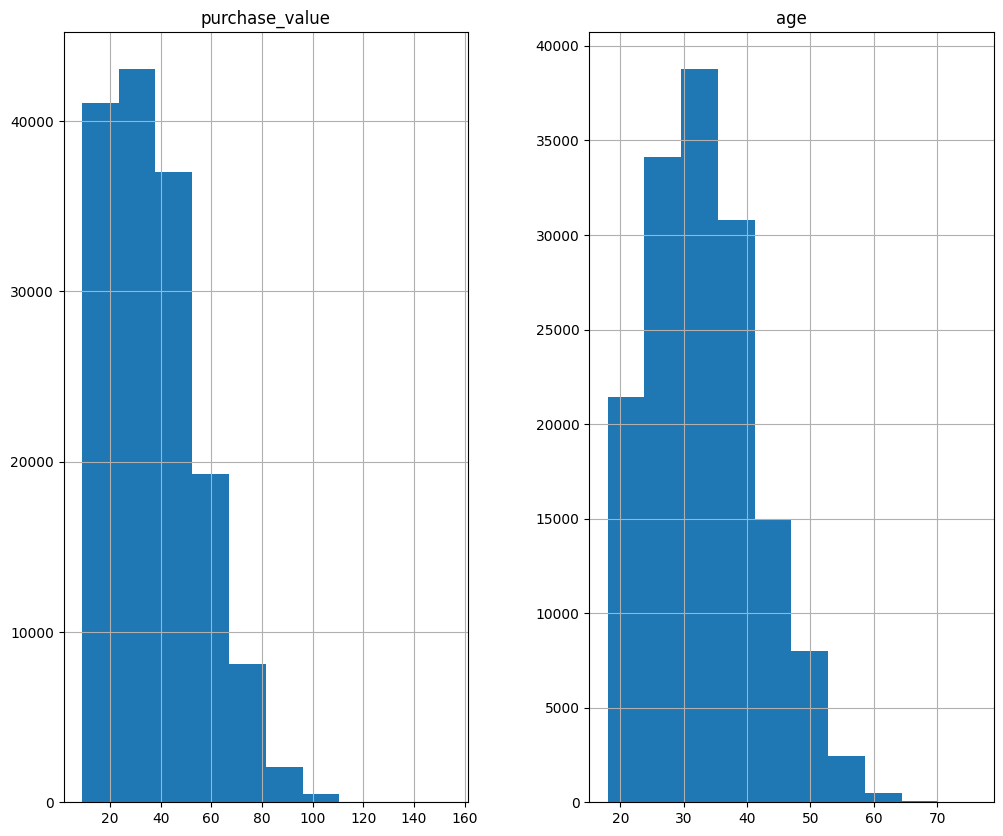

Correlation Matrix:


,user_id,purchase_value,age,ip_address,class
user_id,1.000000,0.002617,0.000611,-0.003144,0.001945
purchase_value,0.002617,1.000000,0.002370,-0.000328,0.001011
age,0.000611,0.002370,1.000000,0.001140,0.006624
ip_address,-0.003144,-0.000328,0.001140,1.000000,-0.005208
class,0.001945,0.001011,0.006624,-0.005208,1.000000



Fraud Cases by Browser:


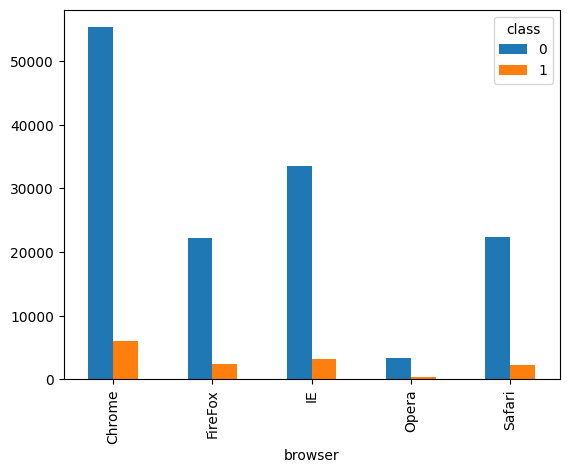

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

def perform_eda(df):
    # Univariate analysis
    df.hist(figsize=(12, 10), column=['purchase_value', 'age'])
    plt.show()

    # Bivariate analysis
    print("Correlation Matrix:")
    display(df.corr(numeric_only=True).style.background_gradient())

    print("\nFraud Cases by Browser:")
    pd.crosstab(df['browser'], df['class']).plot(kind='bar')
    plt.show()

perform_eda(fraud_df)

Merge Datasets for Geolocation Analysis

In [50]:
def merge_geo_data(fraud_df, ip_df):
    # Convert IP ranges to integers using the correct column names
    ip_df['lower_bound_ip_address'] = ip_df['lower_bound_ip_address'].astype('int64') # Changed 'ip_start' to 'lower_bound_ip_address'
    ip_df['upper_bound_ip_address'] = ip_df['upper_bound_ip_address'].astype('int64') # Changed 'ip_end' to 'upper_bound_ip_address'

    # Merge datasets, updating column names in merge_asof
    merged_df = pd.merge_asof(
        fraud_df.sort_values('ip_address'),
        ip_df.sort_values('lower_bound_ip_address'), # Changed 'ip_start' to 'lower_bound_ip_address'
        left_on='ip_address',
        right_on='lower_bound_ip_address', # Changed 'ip_start' to 'lower_bound_ip_address'
        direction='forward'
    )

    # Filter valid matches, using the correct column name
    merged_df = merged_df[merged_df['ip_address'] <= merged_df['upper_bound_ip_address']] # Changed 'ip_end' to 'upper_bound_ip_address'
    return merged_df.drop(columns=['lower_bound_ip_address', 'upper_bound_ip_address']) # Changed dropped columns

Feature Engineering

In [51]:
def create_features(df):
    # Time-based features
    df['hour_of_day'] = df['purchase_time'].dt.hour
    df['day_of_week'] = df['purchase_time'].dt.dayofweek

    # Time since signup (in hours)
    df['time_since_signup'] = (df['purchase_time'] - df['signup_time']).dt.total_seconds() / 3600

    # Transaction frequency
    df = df.sort_values('purchase_time')
    # Use an integer for the window size within transform
    # This calculates the count of transactions within the last 60 minutes
    # (equivalent to 1H if purchase_time has minute-level resolution)
    df['txn_freq_1h'] = df.groupby('user_id')['purchase_time'].transform(
        lambda x: x.rolling(window=60, min_periods=1).count()  # Changed to integer window
    )

    return df

fraud_df = create_features(fraud_df)

In [52]:
fraud_df

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,hour_of_day,day_of_week,time_since_signup,txn_freq_1h
115086,309557.0,2015-01-01 00:00:43,2015-01-01 00:00:44,14.0,BBPACGBUVJUXF,Ads,Chrome,F,38.0,2001426399,1,0,3,0.000278,1.0
41990,124539.0,2015-01-01 00:00:44,2015-01-01 00:00:45,14.0,BBPACGBUVJUXF,Ads,Chrome,F,38.0,2001426399,1,0,3,0.000278,1.0
134836,161246.0,2015-01-01 00:00:45,2015-01-01 00:00:46,14.0,BBPACGBUVJUXF,Ads,Chrome,F,38.0,2001426399,1,0,3,0.000278,1.0
24572,356414.0,2015-01-01 00:00:46,2015-01-01 00:00:47,14.0,BBPACGBUVJUXF,Ads,Chrome,F,38.0,2001426399,1,0,3,0.000278,1.0
106160,338656.0,2015-01-01 00:00:47,2015-01-01 00:00:48,14.0,BBPACGBUVJUXF,Ads,Chrome,F,38.0,2001426399,1,0,3,0.000278,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20486,375442.0,2015-08-17 18:17:44,2015-12-14 23:08:09,10.0,ZBEFPCPZWXIFI,SEO,Chrome,M,39.0,3470044129,0,23,0,2860.840278,1.0
150073,386025.0,2015-08-18 04:31:58,2015-12-15 08:30:14,22.0,KPQQUAPBZTWSG,Direct,Chrome,F,35.0,87238996,0,8,1,2859.971111,1.0
72321,148647.0,2015-08-18 01:00:13,2015-12-15 10:27:53,54.0,KNENGMCLZOFYB,SEO,Chrome,M,33.0,2288378881,0,10,1,2865.461111,1.0
67282,38347.0,2015-08-18 02:33:46,2015-12-15 15:21:39,17.0,EKVQJWCSTGHDV,SEO,Safari,M,25.0,1249638679,0,15,1,2868.798056,1.0


Normalization and Scaling

In [53]:
from sklearn.preprocessing import StandardScaler

def scale_features(df):
    scaler = StandardScaler()
    num_cols = df.select_dtypes(include=np.number).columns.difference(['class', 'user_id', 'device_id'])
    df[num_cols] = scaler.fit_transform(df[num_cols])
    return df

fraud_df = scale_features(fraud_df)

In [54]:
fraud_df

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,hour_of_day,day_of_week,time_since_signup,txn_freq_1h
115086,309557.0,2015-01-01 00:00:43,2015-01-01 00:00:44,-1.251746,BBPACGBUVJUXF,Ads,Chrome,F,0.563874,-0.120721,1,-1.666788,-0.005891,-1.577617,0.0
41990,124539.0,2015-01-01 00:00:44,2015-01-01 00:00:45,-1.251746,BBPACGBUVJUXF,Ads,Chrome,F,0.563874,-0.120721,1,-1.666788,-0.005891,-1.577617,0.0
134836,161246.0,2015-01-01 00:00:45,2015-01-01 00:00:46,-1.251746,BBPACGBUVJUXF,Ads,Chrome,F,0.563874,-0.120721,1,-1.666788,-0.005891,-1.577617,0.0
24572,356414.0,2015-01-01 00:00:46,2015-01-01 00:00:47,-1.251746,BBPACGBUVJUXF,Ads,Chrome,F,0.563874,-0.120721,1,-1.666788,-0.005891,-1.577617,0.0
106160,338656.0,2015-01-01 00:00:47,2015-01-01 00:00:48,-1.251746,BBPACGBUVJUXF,Ads,Chrome,F,0.563874,-0.120721,1,-1.666788,-0.005891,-1.577617,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20486,375442.0,2015-08-17 18:17:44,2015-12-14 23:08:09,-1.470055,ZBEFPCPZWXIFI,SEO,Chrome,M,0.679914,1.055592,0,1.660541,-1.501259,1.716750,0.0
150073,386025.0,2015-08-18 04:31:58,2015-12-15 08:30:14,-0.815129,KPQQUAPBZTWSG,Direct,Chrome,F,0.215753,-1.653919,0,-0.509456,-1.002803,1.715750,0.0
72321,148647.0,2015-08-18 01:00:13,2015-12-15 10:27:53,0.931338,KNENGMCLZOFYB,SEO,Chrome,M,-0.016327,0.109118,0,-0.220124,-1.002803,1.722071,0.0
67282,38347.0,2015-08-18 02:33:46,2015-12-15 15:21:39,-1.088015,EKVQJWCSTGHDV,SEO,Safari,M,-0.944649,-0.722877,0,0.503209,-1.002803,1.725914,0.0


Encode Categorical Features

In [55]:
def encode_features(df):
    # Encode categorical columns
    df = pd.get_dummies(df, columns=['source', 'browser', 'sex'])

    # Drop high-cardinality columns
    df = df.drop(columns=['device_id', 'user_id'])

    return df

fraud_df = encode_features(fraud_df)

In [56]:
fraud_df

,signup_time,purchase_time,purchase_value,age,ip_address,class,hour_of_day,day_of_week,time_since_signup,txn_freq_1h,source_Ads,source_Direct,source_SEO,browser_Chrome,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_F,sex_M
115086,2015-01-01 00:00:43,2015-01-01 00:00:44,-1.251746,0.563874,-0.120721,1,-1.666788,-0.005891,-1.577617,0.0,True,False,False,True,False,False,False,False,True,False
41990,2015-01-01 00:00:44,2015-01-01 00:00:45,-1.251746,0.563874,-0.120721,1,-1.666788,-0.005891,-1.577617,0.0,True,False,False,True,False,False,False,False,True,False
134836,2015-01-01 00:00:45,2015-01-01 00:00:46,-1.251746,0.563874,-0.120721,1,-1.666788,-0.005891,-1.577617,0.0,True,False,False,True,False,False,False,False,True,False
24572,2015-01-01 00:00:46,2015-01-01 00:00:47,-1.251746,0.563874,-0.120721,1,-1.666788,-0.005891,-1.577617,0.0,True,False,False,True,False,False,False,False,True,False
106160,2015-01-01 00:00:47,2015-01-01 00:00:48,-1.251746,0.563874,-0.120721,1,-1.666788,-0.005891,-1.577617,0.0,True,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20486,2015-08-17 18:17:44,2015-12-14 23:08:09,-1.470055,0.679914,1.055592,0,1.660541,-1.501259,1.716750,0.0,False,False,True,True,False,False,False,False,False,True
150073,2015-08-18 04:31:58,2015-12-15 08:30:14,-0.815129,0.215753,-1.653919,0,-0.509456,-1.002803,1.715750,0.0,False,True,False,True,False,False,False,False,True,False
72321,2015-08-18 01:00:13,2015-12-15 10:27:53,0.931338,-0.016327,0.109118,0,-0.220124,-1.002803,1.722071,0.0,False,False,True,True,False,False,False,False,False,True
67282,2015-08-18 02:33:46,2015-12-15 15:21:39,-1.088015,-0.944649,-0.722877,0,0.503209,-1.002803,1.725914,0.0,False,False,True,False,False,False,False,True,False,True
